In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Effect of Social Media on US Elections
Group 14 (IS Investigators): Taniya Chauhan, Shubham Prakash,
Christopher Garrett, Kirti Menghani, Hrutwi Kakadia, Muhammad
Waleed Akram, Nishant Jadhav 

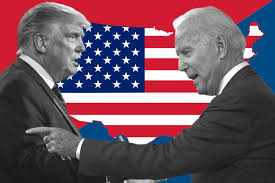

## Introduction

  Our project focused on the one of the most important political events in recent years, the 2020 United States election. We focused on a window of time where a lot of voters cast their vote, October 15th – October 31st. During this timeframe we observed tweets to see if the tweets had any correlation with the result of the election. With Donald Trump being one of the candidates and a prolific figure on Twitter (At the time) it ignited a thought within the group. Does twitter carry an impact on the United States Election?


  We aimed to answer questions that would help layout what took place during the 2020 Election. One of our questions focused on the average sentiment on twitter for every state and how it reflects upon the results. This question allows us to focus on the potential correlation between tweets and winners of the state. This led us to dive deeper with the question did the sentiment of tweets change following a big event on a certain date (town hall meetings, debate, etc.) With this in mind, we proceeded to investigate what was the sentiment change due to the major event (from question 2) driven by a sentiment change in a certain state, this allowed us to answer the previous question better and see the specific change of states. 


  The story we extracted from the data was very insightful towards the nations view on the 2020 U.S Election. This insight can be profound for campaigns, news providers, data companies, and political organizations. This insight can allow companies and organizations to have a better feel for the pulse of the political atmosphere in the nation as it will affect everything from the economy, workforce, markets, and upcoming policy. Specifically, political campaigns and organizations can better understand what drives sentiment to swing and what they can do in the future to better help themselves.  


  We acquired two large data sets from Kaggle (https://www.kaggle.com/manchunhui/us-election-2020-tweets) that are compiled of scraped tweets from the time window October 15th – November 8th. One of the datasets focused of tweets related to Donald Trump, containing 970,919 rows and 21 columns. The other datasets contain tweets focused on Joe Biden has 776,886 rows and the same 21 columns. We also created a data set of the winner from the election in each state by acquiring data from CNN (https://www.cnn.com/election/2020/results/president). This was used in combination with the other two data sets to complete our analyses. We processed and cleaned a large amount of nominal/character data that through various techniques.Our processing allowed us to better understand the story the data/tweets were telling. 

# Project Focus

This project focused more on data processing. This is because twitter data acquired from Kaggle is in raw format and we need to first clean and then transform our data in order to derive valuable insights. Also a lot of major columns like states were mostly null for which we had to impute the data on the basis of the latitude and longitude, from where the tweets were captured.

 ## Data Preprocessing

We load the election results for the 2020 U.S. election. Then we loaded the tweets for Trump and Biden posted during October 15th - November 8th to analyze the correlation between media discussion for elections and the election results.

Firstly, we observe that we have nearly 1 million tweets for Trump which is a lot of data to process and we wanted to reduce the data size. We observe that most of the tweets have 0 likes, i.e., they are not being seen by other people and hence wont be driving the sentiment, rendering them of no value to us. To remove these tweets from the data, we will filter out tweets with 0 likes to get information that are at least liked by 1 individual. In this way, we get rid of most of the unwanted tweets which eventually would not affect the analysis and we reduce the size of dataset.

Next, we extracted date and time to separate columns to perform analysis across these dimensions independently. We dropped redundant columns like city that do not answer our questions of interest. We will impute missing values in columns like state based on information from latitude and longitude columns. We filter out the observations in which key information like state is missing but cannot be imputed in any way. Now that we have our structured data fairly cleaned and transformed, we can work with out text data.

Now, we compute the sentiment for every tweet for both Trump and Biden data individually after cleaning up the tweets(removed stop words, urls). This polarity will help us determine if the tweet supports a particular party or is against it.

Once we are done with processing Trump and Biden data separately, we can merge them. Here, we need to keep a track of the context of our data so that we can differentiate between tweets dedicated towards Trump and Biden during our analysis. 

In [ ]:
## Starting with importing libraries
import pandas as pd
import numpy as np
import re
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Allows to customize the size of the graph
from matplotlib import rcParams


from textblob import Word
import nltk
from textblob import TextBlob # import model from the library for sentiment analysis
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!pip install contractions
import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 321 kB 5.2 MB/s 
     |████████████████████████████████| 284 kB 50.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85456 sha256=cb3a54ddfd54296ed7e2b585f4c0d599bc745be04a0c10b1c5fce22a3d282d5a
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


Loading in the final election results for each U.S. state.

In [ ]:
#final_election = pd.read_csv(r'/content/drive/MyDrive/BUDT704_Project/Election Winner.csv')
final_election = pd.read_csv(r'/content/drive/MyDrive/Election_Winner.csv')
final_election.head()

,State,State Code,Winner,Electoral Votes
0,Alabama,AL,Trump,9
1,Alaska,AK,Trump,3
2,Arizona,AZ,Biden,11
3,Arkansas,AR,Trump,6
4,California,CA,Biden,55


### Trump Tweets data cleaning 

In [ ]:
## Reading the Tweets related to Trump for the time frame: 15th Oct to 8th Nov
trump_tweets=pd.read_csv(r'/content/drive/MyDrive/BUDT704_Project/hashtag_donaldtrump.csv',lineterminator='\n')

In [ ]:
## Looking at first few rows of the data
trump_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [ ]:
## Checking the total number of rows in the data
len(trump_tweets)

970919

In [ ]:
## Checking the names of the columns in the data
trump_tweets.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [ ]:
## Having a look at the numerical columns
trump_tweets.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,9.709190e+05,970919.000000,970919.000000,9.709190e+05,9.709190e+05,445719.000000,445719.000000
mean,1.322494e+18,7.477011,1.698500,4.468311e+17,2.260357e+04,35.697936,-40.369638
std,2.555133e+15,158.058117,40.028419,5.544702e+17,3.042152e+05,18.823129,67.531751
min,1.316529e+18,0.000000,0.000000,5.310000e+02,0.000000e+00,-90.000000,-175.202642
25%,1.320478e+18,0.000000,0.000000,2.169326e+08,7.700000e+01,32.701939,-96.796856
50%,1.323612e+18,0.000000,0.000000,2.373392e+09,4.410000e+02,39.783730,-74.006015
75%,1.324505e+18,1.000000,0.000000,1.078344e+18,2.066000e+03,46.603354,6.776314
max,1.325589e+18,74084.000000,20491.000000,1.325581e+18,1.911533e+07,90.000000,179.048837


We see in the above table that alteast 50% of the tweets have 0 likes. We would like to filter such data for two reasons-
1. Reduce the size of our dataset(It has almost 1Million records)
2. Removing them wont impact our analysis because these tweets were probably seen by very few people and would not drive the sentiment 


In [ ]:
## Checking the distribution of likes 
print(trump_tweets.likes.value_counts().sort_index().head(10))
print(trump_tweets.likes.value_counts().map(lambda x: x*100/len(trump_tweets)).sort_index().head(10))

0.0    548581
1.0    179875
2.0     72982
3.0     37127
4.0     22719
5.0     15254
6.0     11116
7.0      8339
8.0      6755
9.0      5379
Name: likes, dtype: int64
0.0    56.501212
1.0    18.526262
2.0     7.516796
3.0     3.823903
4.0     2.339948
5.0     1.571089
6.0     1.144895
7.0     0.858877
8.0     0.695733
9.0     0.554011
Name: likes, dtype: float64


We see that almost 57% of the tweets have 0 likes and we will remove such cases from our data

In [ ]:
## Removing tweets with no likes as they have no significance
trump_tweets=trump_tweets[trump_tweets['likes']!=0].reset_index(drop=True)
trump_tweets.head(5)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
1,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
2,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
3,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,2013-02-01 01:37:38,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651
4,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",2020-03-26 23:14:28,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364


### Seperates date and time column into their own individual columns allowing further analysis 

In [ ]:
## The created_at column contains the timestamp at which the tweet was posted.
## We would like to take the date and time separately for our futher analysis
## trump_tweets['created_Date']=trump_tweets['created_at'].map(lambda x: re.split(x))[0]
trump_tweets['created_Date']=trump_tweets['created_at'].str.split(' ').str[0]
trump_tweets['created_time']=trump_tweets['created_at'].str.split(' ').str[1]

#Removes redundant column of date and time
trump_tweets = trump_tweets.drop(columns='created_at')
trump_tweets.head(5)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_Date,created_time
0,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,2020-10-15,00:00:01
1,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,2020-10-15,00:00:02
2,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,2020-10-15,00:00:08
3,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,2013-02-01 01:37:38,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,2020-10-15,00:00:17
4,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",2020-03-26 23:14:28,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,2020-10-15,00:00:26


Filter out tweets which were made after the political campaigns ended

In [ ]:
## Removing tweets for date after 31st Oct 2021
trump_tweets=trump_tweets[trump_tweets['created_Date']<='2020-10-31']

In [ ]:
## Checking the number of rows in data now
len(trump_tweets)

144931

In [ ]:
trump_tweets.reset_index(drop=True,inplace=True)

In [ ]:
## Checking the percentage of null in each column
trump_tweets.isnull().sum().map(lambda a:(a/len(trump_tweets))*100)

tweet_id                 0.000000
tweet                    0.000000
likes                    0.000000
retweet_count            0.000000
source                   0.044849
user_id                  0.000000
user_name                0.000690
user_screen_name         0.000000
user_description         6.633501
user_join_date           0.000000
user_followers_count     0.000000
user_location           26.759630
lat                     46.480739
long                    46.480739
city                    72.156405
country                 46.711884
continent               46.706364
state                   59.995446
state_code              61.774224
collected_at             0.000000
created_Date             0.000000
created_time             0.000000
dtype: float64

We see that City has the highest number of null in it. Now since we do not need city in our analysis, as the most granular level of data we will be analysing would be State, we can drop this column

In [ ]:
trump_tweets.drop('city',axis=1,inplace=True)

In [ ]:
## Looking at the data to see if the changes got implemented
trump_tweets.head(5)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time
0,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,2020-10-15,00:00:01
1,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,2020-10-15,00:00:02
2,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,2020-10-15,00:00:08
3,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,2013-02-01 01:37:38,2363.0,"Perris,California",33.782519,-117.228648,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,2020-10-15,00:00:17
4,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",2020-03-26 23:14:28,496.0,"San Diego, CA",32.717421,-117.162771,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,2020-10-15,00:00:26


In [ ]:
## Checking for null value percentages again
trump_tweets.isnull().sum().map(lambda a:(a/len(trump_tweets))*100)

tweet_id                 0.000000
tweet                    0.000000
likes                    0.000000
retweet_count            0.000000
source                   0.044849
user_id                  0.000000
user_name                0.000690
user_screen_name         0.000000
user_description         6.633501
user_join_date           0.000000
user_followers_count     0.000000
user_location           26.759630
lat                     46.480739
long                    46.480739
country                 46.711884
continent               46.706364
state                   59.995446
state_code              61.774224
collected_at             0.000000
created_Date             0.000000
created_time             0.000000
dtype: float64

In [ ]:
## Checking the number of rows in data now
len(trump_tweets)

144931

Since State is an important column in our analysis and we can afford to reduce the size of our data even further, we will remove all those rows where the state is null and the latitude and longitude is null and State code is null
(Basically removing all those rows where there is no way we can get the state information)

In [ ]:
trump_tweets = trump_tweets[trump_tweets['state'].notnull()|(trump_tweets['lat'].notnull()&trump_tweets['long'].notnull())|trump_tweets['state_code'].notnull()]

We also filter out our data to get tweets only for U.S. since we are analyzing tweet correlation with the US elections. Hence, in order to narrow done our scope and to perform targeted analysis we remove tweets from  countries other than the United States

In [ ]:
trump_tweets = trump_tweets[(trump_tweets['country'] == 'United States of America') | (trump_tweets['country'] == 'United States')]

In [ ]:
#Checking that we have tweets only from USA
trump_tweets['country'].value_counts()

United States of America    37768
United States                6709
Name: country, dtype: int64

In [ ]:
## Checking for null value percentages again
trump_tweets.isnull().sum().map(lambda a:(a/len(trump_tweets))*100)

tweet_id                 0.000000
tweet                    0.000000
likes                    0.000000
retweet_count            0.000000
source                   0.000000
user_id                  0.000000
user_name                0.000000
user_screen_name         0.000000
user_description         3.703038
user_join_date           0.000000
user_followers_count     0.000000
user_location            0.000000
lat                      0.000000
long                     0.000000
country                  0.000000
continent                0.000000
state                   15.090946
state_code              15.090946
collected_at             0.000000
created_Date             0.000000
created_time             0.000000
dtype: float64

####We will use the column 'Latitude' and 'Longitude' to impute the missing state values. We identify the range of latitude and logitude for every state by grouping them. 

In [ ]:
#trying to get the list of minimum and maximum latitude and longitude for each state from our data
#this data will be used to impute missing state values
latlong =  trump_tweets.groupby(by='state')[['lat','long']].agg({'min','max'})

In [ ]:
latlong.head()

lat                   long            
                  max        min         max         min
state                                                   
Alabama     34.904955  30.271122  -85.531067  -88.155342
Alaska      71.387113  60.554444 -149.442564 -161.755833
Arizona     36.782334  32.196981 -109.692883 -114.773755
Arkansas    36.372854  33.207630  -90.184539  -94.267040
California  40.586356  32.669804 -115.359567 -123.412640

In [ ]:
#this function returns the state for each latitude and longitude
def get_state_trump(location):
    result =latlong[(location.lat <= latlong['lat']['max'] ) & (location.lat >= latlong['lat']['min']) & ((location.long <= latlong['long']['max']) & (location.long >= latlong['long']['min']))  ]
    if len(result)==0:
        return np.nan
    return result.index[0]

In [ ]:
#Uncomment for the first run 
# %%time
#trump_tweets['imputed_state']= trump_tweets[['lat','long']].apply(get_state_trump,axis=1)

####It takes about five minutes to impute the state from latitude and longitude. So we dump our processed data so that we dont need to run the code everytime. 

In [ ]:
# #using pickle we dump the data

## import pickle
#pickle.dump(trump_tweets['imputed_state'],open(r'/content/drive/MyDrive/BUDT704_Project/trump_imputed_states.pkl','wb'))

In [ ]:
#using pickle to load the data
states_imputed_trump = pickle.load(open(r'/content/drive/MyDrive/BUDT704_Project/trump_imputed_states.pkl','rb'))
trump_tweets['imputed_state']= states_imputed_trump
trump_tweets.head(2)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time,imputed_state
1,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,2020-10-15,00:00:02,Oregon
2,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,2020-10-15,00:00:08,District of Columbia


####We will coalesce the imputed states column into the state column

In [ ]:
trump_tweets['state']=trump_tweets['state'].combine_first(trump_tweets['imputed_state'])

In [ ]:
## Checking for null value percentages again
trump_tweets.isnull().sum().map(lambda a:(a/len(trump_tweets))*100)

tweet_id                 0.000000
tweet                    0.000000
likes                    0.000000
retweet_count            0.000000
source                   0.000000
user_id                  0.000000
user_name                0.000000
user_screen_name         0.000000
user_description         3.703038
user_join_date           0.000000
user_followers_count     0.000000
user_location            0.000000
lat                      0.000000
long                     0.000000
country                  0.000000
continent                0.000000
state                    0.000000
state_code              15.090946
collected_at             0.000000
created_Date             0.000000
created_time             0.000000
imputed_state            0.000000
dtype: float64

Cleaning tweets before we extract sentiment from them.

In [ ]:
#This fuction will remove special characters, http links, urls, white spaces, and digits
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[@#&]"," ",text) # remove @usernames, &words and #hashtags 
    text = re.sub(r"https?://[A-Za-z0-9./]+"," ",text) #remove https links
    text = re.sub(r"[^A-Za-z']"," ",text)  # keep only letters
    text = re.sub(r" +"," ",text) # remove extra spaces
    return text

In [ ]:
#Aplying the clean text function onto our tweets
trump_tweets['clean'] = trump_tweets['tweet'].apply(clean_text)
trump_tweets.head(20)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time,imputed_state,clean
1,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,2020-10-15,00:00:02,Oregon,trump as a student i used to hear for years f...
2,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,2020-10-15,00:00:08,District of Columbia,you get a tie and you get a tie trump s rally ...
3,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,2013-02-01 01:37:38,2363.0,"Perris,California",33.782519,-117.228648,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,2020-10-15,00:00:17,California,clady her minutes were over long time ago oma...
4,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",2020-03-26 23:14:28,496.0,"San Diego, CA",32.717421,-117.162771,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,2020-10-15,00:00:26,California,trump presidenttrump trump landslidevictory t...
8,1.316530e+18,"@cnnbrk #Trump owes #RicardoAguirre $730,000 t...",3.0,2.0,Twitter for iPhone,1.946504e+08,MoClarker,MoClarker,Media Maven/Scientist/Fan O Fauci,2010-09-24 17:15:43,101.0,Santa Monica Beach,47.005211,-88.962910,United States of America,North America,Michigan,MI,2020-10-21 00:00:07.091114077,2020-10-15,00:01:08,Michigan,cnnbrk trump owes ricardoaguirre to pay for t...
9,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,United States of America,North America,Oregon,OR,2020-10-21 00:00:08.210763668,2020-10-15,00:01:14,Oregon,trump nobody likes to tell you this but some ...
14,1.316530e+18,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,3.602439e+07,Baylee,bayleewashere,"when the going gets tough, the weird turn pro....",2009-04-28 08:55:59,1952.0,"Western Washington, USA",41.882823,-87.686307,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.823279381,2020-10-15,00:01:30,Illinois,karatblood kazeplays jc grab realdonaldtrump ...
16,1.316530e+18,Ice Cube is teaming up to work with President ...,14.0,6.0,dlvr.it,2.217181e+09,Conservative Tribune,conserv_tribune,🇺🇸Commentary by The Western Journal \nEditor-i...,2013-11-27 04:58:32,74657.0,United States,39.783730,-100.445882,United States,North America,Kansas,NaN,2020-10-21 00:00:11.569712441,2020-10-15,00:01:32,Kansas,ice cube is teaming up to work with president ...
19,1.316530e+18,#BlacksForTrump \n#BlackVoicesForTrump \n#Bide...,1.0,1.0,Twitter Web App,2.818208e+09,RickenRich,RickenRich,Rickenbacker guitars and basses are the intere...,2014-10-09 03:25:16,604.0,"California, USA",36.701463,-118.755997,United States of America,North America,California,CA,2020-10-21 00:00:12.689362032,2020-10-15,00:01:42,California,blacksfortrump blackvoicesfortrump bidenisara...
20,1.316530e+18,Who does #trump owe 420 million dollars to? Wh...,1.0,0.0,Twitter Web App,1.611077e+07,Therese Flanagan 🌊 🏳️‍🌈✊,the

In [ ]:
#Loading stop words from the stop words corpus
stop_words = stopwords.words('english')

#We cannot remove 'not' as this might effect the sentiment
stop_words.remove('not')

print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
#Loading the lemmatizer function
lemmatizer = WordNetLemmatizer()

In [ ]:
#Function to remove stop words, lemmatization and to expand contractions 
def process_text(text):
    text = ' '.join([contractions.fix(word) for word in word_tokenize(text)]) # expand contractions
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words]) # remove stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    
    return text

In [ ]:
#Passing the tweets through the above function(process_text)
trump_tweets['processed'] = trump_tweets['clean'].apply(process_text)
trump_tweets.head(1)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time,imputed_state,clean,processed
1,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,2020-10-15,00:00:02,Oregon,trump as a student i used to hear for years f...,trump student used hear year ten year heard ch...


In [ ]:
#Extracting sentiment out of the processed tweet
trump_tweets['tweet_sentiment'] = trump_tweets['processed'].apply(lambda text: TextBlob(text).sentiment[0])

### Cleaning Biden data

In [ ]:
## Reading the Tweets related to Biden for the time frame: 15th Oct to 8th Nov
# biden_tweets=pd.read_csv(r'/content/drive/MyDrive/hashtag_joebiden.csv',lineterminator='\n')
biden_tweets=pd.read_csv(r'/content/drive/MyDrive/BUDT704_Project/hashtag_joebiden.csv',lineterminator='\n')
biden_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


Look at columns to see if we have similar columns to the trump tweets

In [ ]:
biden_tweets.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [ ]:
biden_tweets.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,7.768860e+05,776886.000000,776886.000000,7.768860e+05,7.768860e+05,355293.000000,355293.000000
mean,1.322844e+18,10.161164,2.131331,4.532033e+17,2.884994e+04,35.104203,-41.979660
std,2.585560e+15,390.974423,96.661527,5.573483e+17,4.141085e+05,17.907910,67.823724
min,1.316529e+18,0.000000,0.000000,1.081000e+03,0.000000e+00,-79.406307,-172.120051
25%,1.320870e+18,0.000000,0.000000,2.257285e+08,7.400000e+01,31.816038,-97.268406
50%,1.323899e+18,0.000000,0.000000,2.464208e+09,4.280000e+02,39.783730,-74.006015
75%,1.325115e+18,2.000000,0.000000,1.088044e+18,2.081000e+03,43.653482,5.966069
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


Similar to the analysis done for Trump data, we see that for Biden data too, that atleast 50% of the tweets have 0 likes. So we filter out these tweets from the dataframe to reduce the size. Again removing them wont impact our analysis because these tweets were probably seen by very few people and would not drive the sentiment.



In [ ]:
## Checking the distribution of likes 
print(biden_tweets.likes.value_counts().sort_index().head(10))
print(biden_tweets.likes.value_counts().map(lambda x: x*100/len(biden_tweets)).sort_index().head(10))

0.0    416513
1.0    146870
2.0     62402
3.0     32664
4.0     19940
5.0     13594
6.0      9881
7.0      7401
8.0      6047
9.0      4926
Name: likes, dtype: int64
0.0    53.613143
1.0    18.904962
2.0     8.032324
3.0     4.204478
4.0     2.566657
5.0     1.749806
6.0     1.271873
7.0     0.952649
8.0     0.778364
9.0     0.634070
Name: likes, dtype: float64


Once again, simliar to statistics of Trump data the percentage of tweets with 0 likes is approximately 54%. Eliminating them is the next part of cleaning Biden data.

In [ ]:
## Removing tweets with no likes as they have no significance
biden_tweets=biden_tweets[biden_tweets['likes']!=0].reset_index(drop=True)
biden_tweets.head(5)



,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
1,2020-10-15 00:00:41,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,NaN,2020-06-24 05:15:06,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547
2,2020-10-15 00:01:16,1.316530e+18,@tedcruz @cc125 #Trump2020 #BLM #obama #VoteRe...,1.0,0.0,Twitter Web App,1.310040e+18,Infamous One,InfamousOne13,"""The company you keep can have a major impact ...",2020-09-27 02:14:26,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:07.249581962
3,2020-10-15 00:01:20,1.316530e+18,#IceCube isn’t a sellout how long are black pe...,1.0,1.0,Twitter for iPhone,2.851319e+08,𝓐𝓵𝓮𝔁𝓲𝓪 𝓜𝓪𝓻𝓲𝓮𝓮🧘🏾‍♀️🦋✨,alexiamariee_,snap: 𝒜𝓁𝑒𝓍𝒾𝒶𝓂𝒶𝓇𝒾𝑒𝟤𝟨 ig: 𝒜𝓁𝑒𝓍𝒾𝒶𝓂𝒶𝓇𝒾𝑒𝑒. 🕊🙏🏾Kavou...,2011-04-20 15:50:33,582.0,🇨🇱🇧🇸,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:08.285236528
4,2020-10-15 00:01:20,1.316530e+18,BREAKING — Twitter Safety account provides inf...,1.0,1.0,Twitter for iPhone,1.247223e+18,Insider Paper,TheInsiderPaper,Insider Paper is your source to real news from...,2020-04-06 18:09:10,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:07.767409245


###Seperate date and time column into their own individual columns to continue with the anaysis

In [ ]:
## The created_at column contains the timestamp at which the tweet was posted.
## We would like to take the date and time separately for our futher analysis
biden_tweets['created_Date']=biden_tweets['created_at'].str.split(' ').str[0]
biden_tweets['created_time']=biden_tweets['created_at'].str.split(' ').str[1]

#Removes redundant column of date and time
biden_tweets = biden_tweets.drop(columns='created_at')
biden_tweets.head(5)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,created_Date,created_time
0,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15,00:00:22
1,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,NaN,2020-06-24 05:15:06,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547,2020-10-15,00:00:41
2,1.316530e+18,@tedcruz @cc125 #Trump2020 #BLM #obama #VoteRe...,1.0,0.0,Twitter Web App,1.310040e+18,Infamous One,InfamousOne13,"""The company you keep can have a major impact ...",2020-09-27 02:14:26,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:07.249581962,2020-10-15,00:01:16
3,1.316530e+18,#IceCube isn’t a sellout how long are black pe...,1.0,1.0,Twitter for iPhone,2.851319e+08,𝓐𝓵𝓮𝔁𝓲𝓪 𝓜𝓪𝓻𝓲𝓮𝓮🧘🏾‍♀️🦋✨,alexiamariee_,snap: 𝒜𝓁𝑒𝓍𝒾𝒶𝓂𝒶𝓇𝒾𝑒𝟤𝟨 ig: 𝒜𝓁𝑒𝓍𝒾𝒶𝓂𝒶𝓇𝒾𝑒𝑒. 🕊🙏🏾Kavou...,2011-04-20 15:50:33,582.0,🇨🇱🇧🇸,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:08.285236528,2020-10-15,00:01:20
4,1.316530e+18,BREAKING — Twitter Safety account provides inf...,1.0,1.0,Twitter for iPhone,1.247223e+18,Insider Paper,TheInsiderPaper,Insider Paper is your source to real news from...,2020-04-06 18:09:10,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:07.767409245,2020-10-15,00:01:20


Filter out tweets which were made after the political campaigns ended

In [ ]:
## Removing tweets for date after 31st Oct 2021
biden_tweets=biden_tweets[biden_tweets['created_Date']<='2020-10-31']

In [ ]:
len(biden_tweets)

106018

In [ ]:
biden_tweets.reset_index(drop=True,inplace=True)

In [ ]:
## Checking the percentage of null in each column
biden_tweets.isnull().sum().map(lambda a:(a/len(biden_tweets))*100)

tweet_id                 0.000000
tweet                    0.000000
likes                    0.000000
retweet_count            0.000000
source                   0.055651
user_id                  0.000000
user_name                0.003773
user_screen_name         0.000000
user_description         7.577015
user_join_date           0.000000
user_followers_count     0.000000
user_location           27.671716
lat                     46.190270
long                    46.190270
city                    72.341489
country                 46.335528
continent               46.332698
state                   57.735479
state_code              59.171084
collected_at             0.000000
created_Date             0.000000
created_time             0.000000
dtype: float64

Removing the 'City' column as it has highest number of null values. We have the state information so we will be using that for the analysis and not 'City' column

In [ ]:
biden_tweets.drop('city',axis=1,inplace=True)

In [ ]:
## Looking at the data to see if the changes got implemented
biden_tweets.head(5)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time
0,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15,00:00:22
1,1.316529e+18,Proof Bidens are crooked. Twitter will suspen...,1.0,1.0,Twitter for Android,1.275659e+18,Jake Rivendale,JakeRivendale,NaN,2020-06-24 05:15:06,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:04.660445547,2020-10-15,00:00:41
2,1.316530e+18,@tedcruz @cc125 #Trump2020 #BLM #obama #VoteRe...,1.0,0.0,Twitter Web App,1.310040e+18,Infamous One,InfamousOne13,"""The company you keep can have a major impact ...",2020-09-27 02:14:26,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:07.249581962,2020-10-15,00:01:16
3,1.316530e+18,#IceCube isn’t a sellout how long are black pe...,1.0,1.0,Twitter for iPhone,2.851319e+08,𝓐𝓵𝓮𝔁𝓲𝓪 𝓜𝓪𝓻𝓲𝓮𝓮🧘🏾‍♀️🦋✨,alexiamariee_,snap: 𝒜𝓁𝑒𝓍𝒾𝒶𝓂𝒶𝓇𝒾𝑒𝟤𝟨 ig: 𝒜𝓁𝑒𝓍𝒾𝒶𝓂𝒶𝓇𝒾𝑒𝑒. 🕊🙏🏾Kavou...,2011-04-20 15:50:33,582.0,🇨🇱🇧🇸,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:08.285236528,2020-10-15,00:01:20
4,1.316530e+18,BREAKING — Twitter Safety account provides inf...,1.0,1.0,Twitter for iPhone,1.247223e+18,Insider Paper,TheInsiderPaper,Insider Paper is your source to real news from...,2020-04-06 18:09:10,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:07.767409245,2020-10-15,00:01:20


In [ ]:
## Checking for null value percentages again
biden_tweets.isnull().sum().map(lambda a:(a/len(biden_tweets))*100)

tweet_id                 0.000000
tweet                    0.000000
likes                    0.000000
retweet_count            0.000000
source                   0.055651
user_id                  0.000000
user_name                0.003773
user_screen_name         0.000000
user_description         7.577015
user_join_date           0.000000
user_followers_count     0.000000
user_location           27.671716
lat                     46.190270
long                    46.190270
country                 46.335528
continent               46.332698
state                   57.735479
state_code              59.171084
collected_at             0.000000
created_Date             0.000000
created_time             0.000000
dtype: float64

In [ ]:
len(biden_tweets)

106018

In [ ]:
biden_tweets = biden_tweets[biden_tweets['state'].notnull()|(biden_tweets['lat'].notnull()&biden_tweets['long'].notnull())|biden_tweets['state_code'].notnull()]

In [ ]:
biden_tweets = biden_tweets[(biden_tweets['country'] == 'United States of America') | (biden_tweets['country'] == 'United States')]

In [ ]:
biden_tweets['country'].value_counts()

United States of America    33908
United States                5848
Name: country, dtype: int64

We will use the column 'Latitude' and 'Longitude' to impute the missing state values. We identify the range of latitude and logitude for every state by grouping them.

In [ ]:
##this data will be used to impute missing state values
latlong_biden =  biden_tweets.groupby(by='state')[['lat','long']].agg({'min','max'})

In [ ]:
#this function returns the state for each latitude and longitude
def get_states_biden(location):
    result =latlong_biden[(location.lat <= latlong_biden['lat']['max'] ) & (location.lat >= latlong_biden['lat']['min']) & ((location.long <= latlong_biden['long']['max']) & (location.long >= latlong_biden['long']['min']))  ]
    if len(result)==0:
        return np.nan
    return result.index[0]

In [ ]:
#Uncomment when you first run the code
# %%time
# biden_tweets['imputed_state']= biden_tweets[['lat','long']].apply(get_states_biden,axis=1)

It takes about five minutes to impute the state from latitude and longitude. So we dump our processed data so that we dont need to run the code everytime.

In [ ]:
# #using pickle to load the data
## pickle.dump(biden_tweets['imputed_state'],open(r'/content/drive/MyDrive/BUDT704_Project/biden_imputed_states.pkl','wb'))

In [ ]:
states_imputed_biden = pickle.load(open(r'/content/drive/MyDrive/BUDT704_Project/biden_imputed_states.pkl','rb'))
biden_tweets['imputed_state'] = states_imputed_biden
biden_tweets.head(2)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time,imputed_state
0,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15,00:00:22,California
5,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30,954.0,"Champaign, IL",40.116420,-88.243383,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15,00:01:42,Illinois


We will coalesce the imputed states column into the state column



In [ ]:
biden_tweets['state']=biden_tweets['state'].combine_first(biden_tweets['imputed_state'])
biden_tweets.head(2)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time,imputed_state
0,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15,00:00:22,California
5,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30,954.0,"Champaign, IL",40.116420,-88.243383,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15,00:01:42,Illinois


In [ ]:
## Checking for null value percentages again
biden_tweets.isnull().sum().map(lambda a:(a/len(biden_tweets))*100)

tweet_id                 0.000000
tweet                    0.000000
likes                    0.000000
retweet_count            0.000000
source                   0.000000
user_id                  0.000000
user_name                0.000000
user_screen_name         0.000000
user_description         3.730255
user_join_date           0.000000
user_followers_count     0.000000
user_location            0.000000
lat                      0.000000
long                     0.000000
country                  0.000000
continent                0.000000
state                    0.000000
state_code              14.727337
collected_at             0.000000
created_Date             0.000000
created_time             0.000000
imputed_state            0.000000
dtype: float64

Adding tweet sentiment for Biden data

In [ ]:
#This fuction will remove special characters, http links, urls, white spaces, and digits
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[@#&]"," ",text) # remove @usernames, &words and #hashtags 
    text = re.sub(r"https?://[A-Za-z0-9./]+"," ",text) #remove https links
    text = re.sub(r"[^A-Za-z']"," ",text)  # keep only letters
    text = re.sub(r" +"," ",text) # remove extra spaces
    return text
    
#Aplying the clean text function onto our tweets
biden_tweets['clean'] = biden_tweets['tweet'].apply(clean_text)
biden_tweets.head(20)


,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time,imputed_state,clean
0,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15,00:00:22,California,censorship hunterbiden biden bidenemails bide...
5,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illin...,2019-08-24 04:25:30,954.0,"Champaign, IL",40.116420,-88.243383,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15,00:01:42,Illinois,in an effort to find the truth about allegatio...
6,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,2019-06-15 18:24:44,2.0,"Hollywood, FL",34.098003,-118.329523,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15,00:01:47,California,twitter is doing everything they can to help d...
8,1.316530e+18,VOTE FOR #JoeBiden https://t.co/IIROoL5U0O,9.0,5.0,Twitter for iPhone,2.787142e+08,FedUpInAmerica 🏴‍☠️,bvroman1955,VOTE: Your life depends on it!#TrumpLiesAmeric...,2011-04-07 20:36:43,1312.0,"Florida, USA",27.756767,-81.463983,United States of America,North America,Florida,FL,2020-10-21 00:00:13.463509358,2020-10-15,00:01:59,Florida,vote for joebiden
11,1.316530e+18,A simple question. Who are you voting for? #20...,1.0,1.0,Twitter for Android,8.957270e+17,John MacDonald for the People,jmac4thepeople,"Father, veteran, veteran's advocate, former ca...",2017-08-10 19:22:18,1253.0,"Lowell, MA",42.633425,-71.316172,United States of America,North America,Massachusetts,MA,2020-10-21 00:00:19.159609471,2020-10-15,00:02:35,Massachusetts,a simple question who are you voting for elect...
12,1.316530e+18,Has this awoken you from your slumbers yet @BB...,1.0,0.0,Twitter for iPhone,5.667098e+07,malcolm cowing,MalcolmCowing,Retired former Managing Partner of marcoms age...,2009-07-14 11:36:31,1349.0,"Yorkshire, England",38.793099,-77.447943,United States of America,North America,Virginia,VA,2020-10-21 00:00:21.748745887,2020-10-15,00:02:50,Maryland,has this awoken you from your slumbers yet bbc...
15,1.316530e+18,"Hunter #Biden introduced his father, then-Vice...",1.0,0.0,Twitter for Android,1.936873e+08,Gaminglawyer,GamingLawyer,Legal & Business Services 4 Online Gaming & Ga...,2010-09-22 13:10:30,2418.0,"New York, USA",40.712728,-74.006015,United States of America,North America,New York,NY,2020-10-21 00:00:27.444846,2020-10-15,00:03:17,New Jersey,hunter biden introduced his father then vice p...
29,1.316530e+18,Uh oh Joe... Things really seem to be unwindin...,1.0,0.0,Twitter for iPhone,1.299818e+18,Support Our President,SupportOurPres,Married my high school sweetheart. Trump has d...,2020-08-29 21:14:45,317.0,United States,39.783730,-100.445882,United States,North America,Kansas,NaN,2020-10-21 00:00:39.872700792,2020-10-15,00:05:01,Kansas,uh oh joe things really seem to be unwinding f...
30,1.316530e+18,Laptop computer abandoned at Delaware repair s...,1.0,1.0,Twitter Web App,9.114597e+07,H L Wegley,hlwegley,Meteorologist & Comp Sci guy who writes novels...,2009-11-19 17:13:18,3313.0,Seattle area,47.603832,-122.330062,United States of America,North America,Washington,WA,2020-10-21 00:00:40.390528075,2020-10-15,00:05:04,Washington,laptop computer abandoned at delaware repair s...
33,1.316531e+18,#Biden lied https://t.co/Lqy0TBpXkg,3.0,0.0,Twitter for iPhone,5.052006e+08,Todd Nelon,ToddNelon,The Roof Troop,2012-02-27 00:44:30,106.0,"Atlanta, 

In [ ]:
#Loading stop words from the stop words corpus
stop_words = stopwords.words('english')

#We cannot remove 'not' as this might effect the sentiment
stop_words.remove('not')

print(stop_words)

#Loading the lemmatizer function
lemmatizer = WordNetLemmatizer()

#Function to remove stop words, lemmatization and to expand contractions 
def process_text(text):
    text = ' '.join([contractions.fix(word) for word in word_tokenize(text)]) # expand contractions
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words]) # remove stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    
    return text

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
#Aplying the above function to our tweets
biden_tweets['processed'] = biden_tweets['clean'].apply(process_text)
biden_tweets.head(1)

#Extracting the sentiment out of our processed tweets
biden_tweets['tweet_sentiment'] = biden_tweets['processed'].apply(lambda text: TextBlob(text).sentiment[0])

### Merging Trump and Biden tweets

####Adding flags 'Trump' and 'Biden' to the respective dataset before merging so that we can identify the sentiments for each party(The sentiments range from -1 to +1 with -ve being negative towards a particular party and +ve being positive towards a particular party)

In [ ]:
trump_tweets['Leader_flag']='Trump'

In [ ]:
biden_tweets['Leader_flag']='Biden'

In [ ]:
# Now we combine the tweets for Trump and Biden
tweets_data=pd.concat([trump_tweets,biden_tweets])

In [ ]:
tweets_data.head(2)

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,state,state_code,collected_at,created_Date,created_time,imputed_state,clean,processed,tweet_sentiment,Leader_flag
1,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,2020-10-15,00:00:02,Oregon,trump as a student i used to hear for years f...,trump student used hear year ten year heard ch...,0.333333,Trump
2,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,2020-10-15,00:00:08,District of Columbia,you get a tie and you get a tie trump s rally ...,get tie get tie trump rally iowa,0.000000,Trump


## Checking Whether Twitter Sentiment Matches The Results Of The 2020 Election (State)

In [ ]:
# #using pickle to load the data
pickle.dump(tweets_data,open(r'/content/drive/MyDrive/BUDT704_Project/tweets_data.pkl','wb'))

In [ ]:
#Loading the pickled data back
tweets_data = pickle.load(open(r'/content/drive/MyDrive/BUDT704_Project/tweets_data.pkl','rb'))

In [ ]:
#Seeing how many tweets each state has
state_count = pd.DataFrame(tweets_data.groupby(by='imputed_state')['tweet_id'].count().sort_values(ascending=False)).reset_index().rename(columns={'tweet_id':'Count', 'imputed_state':'State'})

In [ ]:
#Assigning a vote of 1 for positive tweets where as -1 for negative tweets
threshold = 0
tweets_data['final_vote'] = tweets_data.tweet_sentiment.map(lambda x: -1 if x<threshold else (1 if x>threshold else 0))
tweets_data = tweets_data[tweets_data.final_vote != 0]
len(tweets_data)

50096

In [ ]:
#Counting the number of votes for each candidate
final_vote_count = tweets_data.groupby(by=['imputed_state','Leader_flag', 'final_vote']).agg({'final_vote':'count'})
final_vote_count = final_vote_count.unstack().unstack().swaplevel(1,2, axis=1)

In [ ]:
#Summing up Biden +1 & Trump -1 as Biden Final Vote Count. And then similarly for trump 
#After getting the final votes for each candidate we are checking who won in each state
predicted_winner = pd.DataFrame(final_vote_count.apply(lambda x: 'Trump' if x[0]+x[3]>x[1]+x[2] else 'Biden', axis=1).reset_index().rename(columns={0:'Predicted Winner', 'imputed_state':'State'}))

In [ ]:
#Merging actual election results with the predicted ones
state_results_pred_actual = pd.merge(predicted_winner, final_election, on='State')
state_results_pred_actual = pd.merge(state_results_pred_actual, state_count, on='State')

In [ ]:
#Sorting by the count of tweets (Descending)
state_results_pred_actual = state_results_pred_actual.sort_values(by='Count', ascending=False)

In [ ]:
#Checking how many state twitter predicted correctly
(state_results_pred_actual['Predicted Winner']==(state_results_pred_actual['Winner'].str.strip())).sum()


30

In [ ]:
state_results_pred_actual.head(10)

,State,Predicted Winner,State Code,Winner,Electoral Votes,Count
16,Kansas,Biden,KS,Trump,6,13008
4,California,Biden,CA,Biden,55,12296
30,New Jersey,Biden,NJ,Biden,14,9920
9,Florida,Trump,FL,Trump,29,6718
43,Texas,Biden,TX,Trump,38,6432
32,New York,Biden,NY,Biden,29,4001
8,District of Columbia,Biden,DC,Biden,3,3913
13,Illinois,Biden,IL,Biden,20,2908
21,Massachusetts,Biden,MA,Biden,11,1860
35,Ohio,Biden,OH,Trump,18,1777


Looking at the above data we can see that twitter was able to correctly predict the final results for 7 out of 10 states with the highest tweet count

In [ ]:
#Assigning  a flag to the states twitter predicted correctly
state_results_pred_actual['Colour_flag']=state_results_pred_actual.apply(lambda x: 1 if x[1]==x[3].strip() else 0, axis=1)

In [ ]:
state_results_pred_actual.head(10)

,State,Predicted Winner,State Code,Winner,Electoral Votes,Count,Colour_flag
16,Kansas,Biden,KS,Trump,6,13008,0
4,California,Biden,CA,Biden,55,12296,1
30,New Jersey,Biden,NJ,Biden,14,9920,1
9,Florida,Trump,FL,Trump,29,6718,1
43,Texas,Biden,TX,Trump,38,6432,0
32,New York,Biden,NY,Biden,29,4001,1
8,District of Columbia,Biden,DC,Biden,3,3913,1
13,Illinois,Biden,IL,Biden,20,2908,1
21,Massachusetts,Biden,MA,Biden,11,1860,1
35,Ohio,Biden,OH,Trump,18,1777,0


In [ ]:
#Getting the top 10 states based on number of tweets
statewise_count=state_results_pred_actual.sort_values(by=['Count'],ascending=False).head(10)
top_ten_states=statewise_count['State Code'].tolist()


In [ ]:
#Creating the map plot
fig = go.Figure(data=go.Choropleth(
    locations=state_results_pred_actual['State Code'],
    z = state_results_pred_actual['Colour_flag'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'greens',
    marker_line_color='black',
    showscale = False,
    text = state_results_pred_actual['State']+'<br>'+'Tweet Count: ' + state_results_pred_actual['Count'].astype('str') +'<br>'+ 'Actual Winner: '+state_results_pred_actual['Winner']+'<br>'+'Predicted Winner: '+state_results_pred_actual['Predicted Winner'],
    hoverinfo='text',
    
))

fig.update_layout(
    title_text = "2020 U.S. Election Results vs. Twitter Prediction",
    geo_scope='usa', # limit map scope to USA
)

# to add these outlines"
# add layer of states to highlight
# turn their texture alpha to 0
# set their marker_line_color to a nice Green
# and turn off the scale
chorpleth = go.Choropleth(
        locationmode='USA-states',
        z=[0,0,0,0,0,0,0,0,0,0,0,0],
        locations=top_ten_states,
        colorscale = [[0,'rgba(0, 0, 0, 0)'],[1,'rgba(0, 0, 0, 0)']],
        marker_line_color='yellowgreen',
        marker_line_width=4,
        showscale = False,
        text = state_results_pred_actual['State']+'<br>'+'Tweet Count: ' + state_results_pred_actual['Count'].astype('str') +'<br>'+ 'Actual Winner: '+state_results_pred_actual['Winner']+'<br>'+'Predicted Winner: '+state_results_pred_actual['Predicted Winner'],
        hoverinfo='text',
        
    )

fig.add_trace(chorpleth)


fig.show()

### Interpretation of the above Map

The above graph shows that twitter sentiments could predict the results accurately for 30 out of the 51 states(including DC), which is a ~60% accuracy. These 30 states have been highlighted in the map above, by a dark green color. Furthermore, for the top ten states with highest number of tweets, we were able to predict accurately for with a 70% accuracy. However, we couldn't predict correctly for three of the top ten states - Kansas, Ohio, Texas. It is to be noted that due to the nature of this election producing a high amount of political instability and volatility, our model may have been more accurate if the election wasn't filled controversy and speculation.  <br>
(The states from which people have tweeted the most are represented by a light green border.) 
 

## Tracking The Candidates's Twitter Sentiment Over The Final Portion Of Thier Campaign

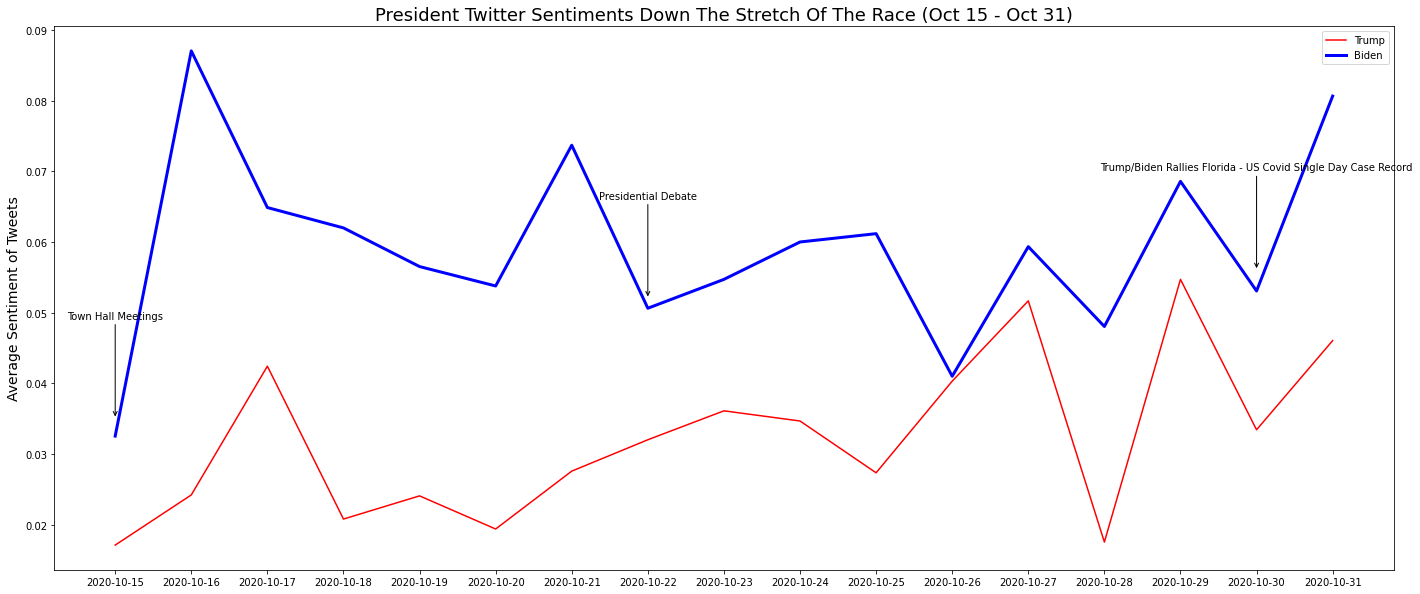

In [ ]:
rcParams['figure.figsize'] = 24, 10
#Groups all the sentiments with their respective date to find the average of each day.
test_date_sent = pd.DataFrame()
test_date_sent = trump_tweets.groupby('created_Date')['tweet_sentiment'].mean()

#Groups all the sentiments with their respective date to find the average of each day.
test_date_sent2 = pd.DataFrame()
test_date_sent2 = biden_tweets.groupby('created_Date')['tweet_sentiment'].mean()

# line 1
plt.plot(test_date_sent, color = 'Red')

# line 2
plt.plot(test_date_sent2, color='Blue', linewidth=3)

#States what this data is showing and applie correct labbeling to y axis (no x label as this is the date)
plt.title("President Twitter Sentiments Down The Stretch Of The Race (Oct 15 - Oct 31)",fontsize=18)
plt.ylabel("Average Sentiment of Tweets",fontsize=14)

#Informs reader on what president is representing which line (Used colors blue and red to go with Democratic and Republican)
plt.legend(['Trump', 'Biden'])

#Showing where two of the biggest event's down the stretch happened
plt.annotate('Town Hall Meetings',
            xy=(0,.035), xycoords='data',
            xytext=(0, 100), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), ha='center')
#Highlighting the shift in sentiment following the presidential debate
plt.annotate('Presidential Debate',
            xy=(7,.052), xycoords='data',
            xytext=(0, 100), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), ha='center')

#The final big event during the election
plt.annotate('Trump/Biden Rallies Florida - US Covid Single Day Case Record',
            xy=(15,.056), xycoords='data',
            xytext=(0, 100), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), ha='center')

#Displays the plot
plt.show()

The above plot shows how the sentiments of people are changing over the period of elections i.e. from October 15th to October 31st. There is no significant pattern in the average sentiment. However, we could fairly say that the events that took place during the elections affected the change in the average sentiment.

We can see that after the Town Hall Meetings that happened on October 15th, 2020, people started showing support for Biden, as a result of which there was an increase in positive sentiment of Tweets. However for Trump, this rise was not that significant as was for Biden. This might have happened because of the presidential debate getting cancelled due to Trump contacting Covid. Instead of the debate, separate townhall meetings were held where Biden performed better  <br>

What happened in the Presidential Debate that took place on October 22nd 2020, brought significant changes in average sentiment for Biden. On the day of the debate, the support/sentiment for Biden decreased sharply, but for Trump, it remained to increase.



 

# Analyzing Biden's Drop In Sentiment Due To Presidential Debate (October 22nd)

In [ ]:
#Selecting the top 10 states based on the tweet count of every state (top 10 states where maximum tweets came from)
df_statewise_count = tweets_data.groupby(['imputed_state']).agg(tweet_count=('tweet_id','count'))
df_statewise_count=df_statewise_count.reset_index()
df_statewise_count=df_statewise_count.sort_values(by=['tweet_count'],ascending=False).head(10)
Top_states=df_statewise_count['imputed_state'].tolist()

In [ ]:
#Fetching the data from the tweets_data (main) dataframe for Biden for the day of the event and the day following the event for the above selected top 10 states
df_biden_day1 = tweets_data[(tweets_data['Leader_flag'] == 'Biden') & (tweets_data["created_Date"] == '2020-10-21') & (tweets_data['imputed_state'].isin(Top_states))].groupby(['imputed_state','created_Date','Leader_flag']).agg(avg_sentiment = ('tweet_sentiment', 'mean')).round(2)
df_biden_day2 = tweets_data[(tweets_data['Leader_flag'] == 'Biden') & (tweets_data["created_Date"] == '2020-10-22') & (tweets_data['imputed_state'].isin(Top_states))].groupby(['imputed_state','created_Date','Leader_flag']).agg(avg_sentiment = ('tweet_sentiment', 'mean')).round(2)

In [ ]:
#Calculating the sentiment change from the previous day to the day after the event
day1_day2_merge = pd.merge(df_biden_day1, df_biden_day2, on='imputed_state', how='inner')
day1_day2_merge["sentiment_delta"] = ((day1_day2_merge["avg_sentiment_y"] - day1_day2_merge["avg_sentiment_x"])*100)/day1_day2_merge["avg_sentiment_x"]

In [ ]:
day1_day2_merge = day1_day2_merge.reset_index()

In [ ]:
day1_day2_merge = day1_day2_merge.sort_index()

In [ ]:
day1_day2_merge.head()

,imputed_state,avg_sentiment_x,avg_sentiment_y,sentiment_delta
0,California,0.13,0.11,-15.384615
1,District of Columbia,0.08,0.12,50.000000
2,Florida,0.12,-0.10,-183.333333
3,Illinois,0.10,0.07,-30.000000
4,Kansas,0.07,0.09,28.571429


In [ ]:
color = ["green" if sent >=0 else "red" for sent in day1_day2_merge["sentiment_delta"]]

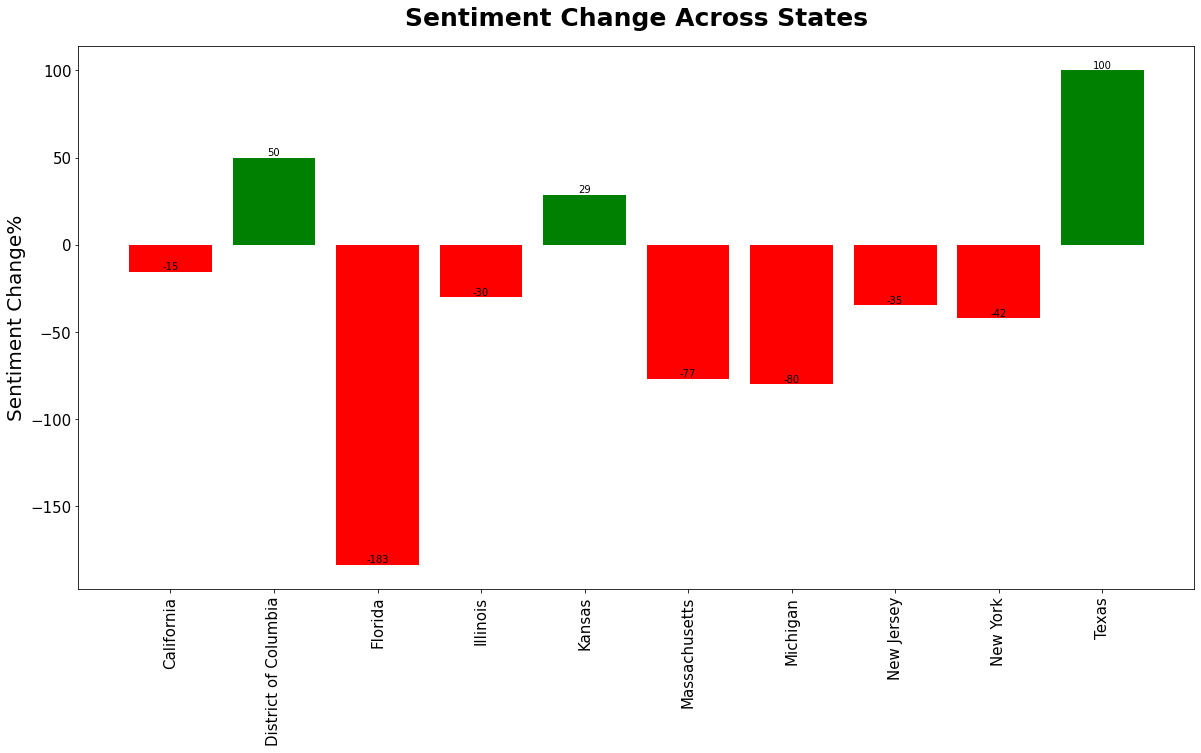

In [ ]:
#Plotting and Formatting
plt.figure(figsize=(20,10))
plt.ylabel('Sentiment Change%', fontdict={'fontsize': 20, 'color': 'black'})
plt.title('Sentiment Change Across States', fontdict={'fontsize': 25, 'fontweight': 700, 'color': 'black'}, pad=20)
plt.yticks(color='black', fontsize=15)
plt.xticks(rotation='vertical', color='black', fontsize=15)
bars = plt.bar(x=day1_day2_merge.imputed_state, height=day1_day2_merge.sentiment_delta,color=color)

for p in bars:
    height = p.get_height()
    #plt.annotate('{}'.format(height),xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')       
    plt.annotate(f'{height:.0f}',xy=(p.get_x() + p.get_width() /2, height), ha='center', va='bottom')       

Based on the graph above, we see a significant swing in sentiment for anti-Biden Floridians. It can be inferred, that the "Florida Email scandal" had an impact on this. Floridians received emails being threatened to vote for Trump or "we are coming after you". The FBI had strong reason to believe that it was either Iranian or Russian collusion trying to affect the election results by tarnishing Trump. Because of this, many people believe that foreign powers that we have hostile relations with, like Iran and Russia, favor Biden over Trump. During the presential debate, trump was asked about the emails and his repone was along the lines of Russia and the middle east does not want him in power, so they are colluding to have Biden win. Florida Sen. Marco Rubio added to the fire as he is a Trump favoring republican and further added to the notion that trump is being discredit by foreign powers. 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.tampabay.com/news/florida-politics/elections/2020/10/23/the-florida-emails-came-up-in-the-debate-biden-and-trump-disagreed-on-those-too/

# Conclusion

Steakholder utility:

This insight using twitter to track public sentiment can be extremly useful to many industries including campaign managers, lobbyists, Fortune 500 Companies, tax professionals, and other politicians as well. Using similar models stakeholders can track sentiment around specific events whether its helping correlate public opinion on a certian stock, a specific bill in congress, political movements, the posibilities are endless.

So we chose this topic to understand how well the discussions over social media specifically twitter mirror real world outcomes and can it be used to predict election results. Through this we got to learn a lot about how a simple tweet can trigger a ripple effect and how massively it can impact a real-life event. Additionally,  we observed correlation between sentiment trends and one of the biggest political event. We had a really fun time working on this and got to learn a lot about the impact of data and how it can be used to predict elections if analyzed with proper caution. We gained a lot of insights about how different factors like how a single state(Florida) influenced the polls or how a debate can impact the course on election results. I'm glad we got the opportunity to do it together as a group, we got to learn a lot collectively as well as from each other. 
